<a href="https://colab.research.google.com/github/404S-retr0/RINEX_Project_Submission/blob/main/project/MinorProject1_AnuragDe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
To tie most of what we have learned together in this tutorial, let's analyse the *world-happiness* dataset.

Below are the tasks that need to be done.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data
load the data in `data/world-happiness/{year}.csv` for each year 

to each a column 'data_year' to keep track of the source year

In [2]:
!wget --no-check-certificate \https://raw.githubusercontent.com/404S-retr0/RINEX_Project_Submission/main/data/2015.csv \-O /data/world-happiness/2015.csv
!wget --no-check-certificate \https://raw.githubusercontent.com/404S-retr0/RINEX_Project_Submission/main/data/2016.csv \-O /data/world-happiness/2016.csv
!wget --no-check-certificate \https://raw.githubusercontent.com/404S-retr0/RINEX_Project_Submission/main/data/2017.csv \-O /data/world-happiness/2017.csv
# Importing the 3 datasets
data_2015 = pd.read_csv("/data/world-happiness/2015.csv")
data_2016 = pd.read_csv("/data/world-happiness/2016.csv")
data_2017 = pd.read_csv("/data/world-happiness/2017.csv")

--2022-01-13 22:03:30--  https://raw.githubusercontent.com/404S-retr0/RINEX_Project_Submission/main/data/2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16557 (16K) [text/plain]
Saving to: ‘/data/world-happiness/2015.csv’

/data/world-happine 100%[===================>]  16.17K  --.-KB/s    in 0s      

2022-01-13 22:03:30 (105 MB/s) - ‘/data/world-happiness/2015.csv’ saved [16557/16557]

--2022-01-13 22:03:30--  https://raw.githubusercontent.com/404S-retr0/RINEX_Project_Submission/main/data/2016.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting r

## Correcting column names
correct the column names in the 2017 data so to be consistent with the previous years

In [3]:
data_2017.rename(columns={"Happiness.Rank": "Happiness Rank","Happiness.Score":"Happiness Score",
                          "Economy..GDP.per.Capita.":"Economy (GDP per Capita)","Health..Life.Expectancy.":"Health (Life Expectancy)",
                          "Trust..Government.Corruption.":"Trust (Government Corruption)","Dystopia.Residual":"Dystopia Residual"}, inplace=True)

# Standardize Country names
correct the names in all DataFrames to common ones.

**HINT**: you can use the following correction dictionary or create your own
```python
correcting_country_names = {
    'Taiwan': 'Taiwan Province of China',
    'Hong Kong': 'Hong Kong S.A.R., China',
}
```

In [4]:
print("changing the name of country")
print(data_2017.loc[32,'Country'])
print(data_2017.loc[70,'Country'])
print("to Taiwan and Hong Kong")
data_2017.loc[32,'Country']='Taiwan'
data_2017.loc[70,'Country']='Hong Kong'
print(data_2017.loc[32,'Country'])
print(data_2017.loc[70,'Country'])

changing the name of country
Taiwan Province of China
Hong Kong S.A.R., China
to Taiwan and Hong Kong
Taiwan
Hong Kong


In [5]:
data_2015 = data_2015.set_index("Country")
data_2016 = data_2016.set_index("Country")
data_2017 = data_2017.set_index("Country")

## Remove Inconsistent Countries 
remove the rows of the countries that are not in all datasets

In [6]:
data_2015 = data_2015.drop("Central African Republic")
data_2015 = data_2015.drop("Comoros")
data_2015 = data_2015.drop("Djibouti")
data_2015 = data_2015.drop("Laos")
data_2015 = data_2015.drop("Lesotho")
data_2015 = data_2015.drop("Mozambique")
data_2015 = data_2015.drop("Oman")
data_2015 = data_2015.drop("Somaliland region")
data_2015 = data_2015.drop("Suriname")
data_2015 = data_2015.drop("Swaziland")
data_2016 = data_2016.drop("Belize")
data_2016 = data_2016.drop("Comoros")
data_2016 = data_2016.drop("Laos")
data_2016 = data_2016.drop("Namibia")
data_2016 = data_2016.drop("Puerto Rico")
data_2016 = data_2016.drop("Somalia")
data_2016 = data_2016.drop("Somaliland Region")
data_2016 = data_2016.drop("South Sudan")
data_2016 = data_2016.drop("Suriname")
data_2017 = data_2017.drop("Belize")
data_2017 = data_2017.drop("Central African Republic")
data_2017 = data_2017.drop("Lesotho")
data_2017 = data_2017.drop("Mozambique")
data_2017 = data_2017.drop("Namibia")
data_2017 = data_2017.drop("Somalia")
data_2017 = data_2017.drop("South Sudan")

## Remove Inconsistent Columns 
remove the columns that are not in all datasets

In [7]:
data_2015 = data_2015.drop(columns="Standard Error")
data_2016 = data_2016.drop(columns=["Lower Confidence Interval","Upper Confidence Interval"])
data_2017 = data_2017.drop(columns=["Whisker.high","Whisker.low"])

## Add Region to 2017 data
add Region column to the 2017 data by using the same mapping of the previous years 

In [8]:
Region = data_2016['Region']
data_2017.insert(loc=0, column='Region', value=Region)

#Add year number to each year dataframe

In [9]:
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017

## Combine All DataFrames
now that all three dataframes have been standardized, we can combine them (vertically)

In [10]:
data = pd.concat([data_2015, data_2016, data_2017], axis=0)

In [11]:
data

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
Norway,Western Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
...,...,...,...,...,...,...,...,...,...,...,...
Togo,Sub-Saharan Africa,150,3.495,0.305445,0.431883,0.247106,0.380426,0.095665,0.196896,1.837229,2017
Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017
Syria,Middle East and Northern Africa,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017


## Analysing the data
Use the cleaned dataset to answer the following questions/tasks.

Feel free to explore more and answer your own questions.

### Which country is consistely more Generous? which least Generous?

In [12]:
column=data['Generosity']
max_index=column.idxmax()
print(max_index,'is more generous country')
min_index=column.idxmin()
print(min_index,'is less generous country')

Myanmar is more generous country
Greece is less generous country


### Which country has seen the biggest drop in Happiness Score within 1 year? which the biggest increase?

In [13]:
datastatcountry=data.groupby(by='Country')['Happiness Score'].describe()
datastatcountry['max-min(Happiness Score)']=datastatcountry['max']-datastatcountry['min']
column=datastatcountry['max-min(Happiness Score)']
max_index=column.idxmax()
print(max_index,'is biggest drop in Happiness Score')
min_index=column.idxmin()
print(min_index,'is smallest drop in Happiness Score')

Venezuela is biggest drop in Happiness Score
Burundi is smallest drop in Happiness Score


### Which Region, on average, has seen the biggest drop in Happiness Score within 1 year? which the biggest increase?

In [14]:
datastatregion=data.groupby(by='Region')['Happiness Score'].describe()
datastatregion['max-min(Happiness Score)']=datastatregion['max']-datastatregion['min']
column1=datastatregion['max-min(Happiness Score)']
max_index=column1.idxmax()
print(max_index,'is biggest drop in Happiness Score')
min_index=column1.idxmin()
print(min_index,'is smallest drop in Happiness Score')
print('\n')
column2=datastatregion['mean']
max_index=column2.idxmax()
print(max_index,'is biggest average in Happiness Score')
min_index=column2.idxmin()
print(min_index,'is smallest average in Happiness Score')

Middle East and Northern Africa is biggest drop in Happiness Score
Australia and New Zealand is smallest drop in Happiness Score


Australia and New Zealand is biggest average in Happiness Score
Sub-Saharan Africa is smallest average in Happiness Score


### Which variables are most/least correlated with *Happiness Score*? make a scatterplot of them against *Happiness Score*.
NOTE: remove *Happiness Rank* 

In [15]:
listcor =[data['Dystopia Residual'].corr(data['Happiness Score']),
          data['Generosity'].corr(data['Happiness Score']),
          data['Trust (Government Corruption)'].corr(data['Happiness Score']),
          data['Freedom'].corr(data['Happiness Score']),
          data['Health (Life Expectancy)'].corr(data['Happiness Score']),
          data['Family'].corr(data['Happiness Score']),
          data['Economy (GDP per Capita)'].corr(data['Happiness Score']),
          ]
print(max(listcor),' => Economy (GDP per Capita) most correlated with Happiness Score (strong +ve correlation)')
print(min(listcor),' => Generosity least correlated with Happiness Score (Weak +ve correlation)')

0.7924327637403543  => Economy (GDP per Capita) most correlated with Happiness Score (strong +ve correlation)
0.1736856909990466  => Generosity least correlated with Happiness Score (Weak +ve correlation)


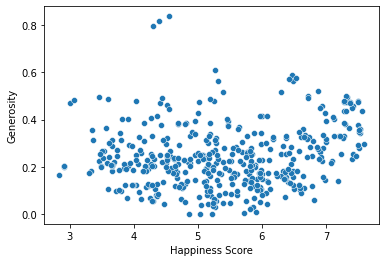

In [16]:
import seaborn as sns
sns.scatterplot(x=data['Happiness Score'], y=data['Generosity'])

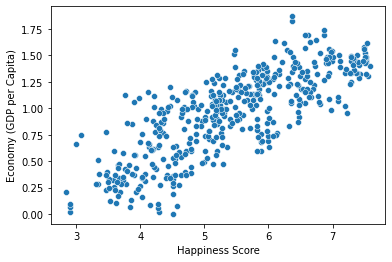

In [17]:
sns.scatterplot(x=data['Happiness Score'], y=data['Economy (GDP per Capita)'])

### Taking the data average, is it clear if we getting happier or sadder? Which was the saddest year?

In [18]:
datastat=data.groupby(by='Year')['Happiness Score'].describe()
print(datastat)
column=datastat['mean']
min_index=column.idxmin()
print('\n',min_index,'is saddest year')

      count      mean       std    min      25%     50%      75%    max
Year                                                                   
2015  148.0  5.402514  1.154213  2.839  4.54200  5.3090  6.29575  7.587
2016  148.0  5.391919  1.148803  2.905  4.40175  5.3515  6.33175  7.526
2017  148.0  5.402365  1.114185  2.905  4.52975  5.3175  6.21200  7.537

 2016 is saddest year
